**1.导入需要的库**

In [1]:
from sklearn.datasets import load_breast_cancer #乳腺癌数据
from sklearn.ensemble import RandomForestClassifier #随机森林分类器
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.model_selection import cross_val_score #交叉验证
import matplotlib.pyplot as plt #画图
import pandas as pd
import numpy as np

**2.导入数据集，探索数据**

In [2]:
data = load_breast_cancer()

In [3]:
data #字典

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**3.进行一次简单的建模**

In [6]:
rfc = RandomForestClassifier(n_estimators=100,random_state=4) #实例化

#交叉验证。第1个参数：实例化对象；第2个参数：特征矩阵数据；第3个参数：标签数据；第4个参数：交叉验证次数；第5个参数：打分指标。
score_pre = cross_val_score(rfc, data.data, data.target, cv=10, scoring="accuracy").mean() #对10个结果求均值
score_pre

0.9719298245614034

**4.调参-1：n_estimators**

0.9719298245614034 71


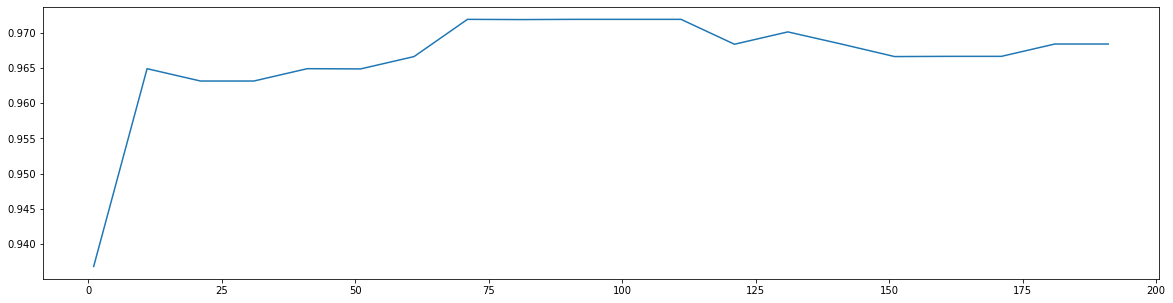

In [7]:
scorel = []
for i in range(0,200,10):#i=1,11,21,31,...
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1
                                ,random_state=4)
    score = cross_val_score(rfc, data.data, data.target, cv=10, scoring="accuracy").mean()
    scorel.append(score)

#list.index([object])：返回object在列表list中的索引
print(max(scorel),(scorel.index(max(scorel))*10)+1) #返回最高分和对应n_estimators的值

#画图
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
#plt.show()

0.9736842105263157 75


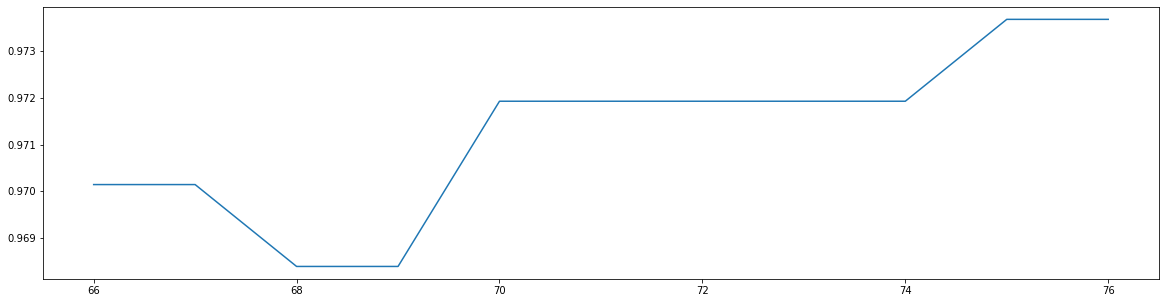

In [8]:
scorel = []
for i in range(66,77):#i=66,67,...,74,75,76
    rfc = RandomForestClassifier(n_estimators=i
                                ,n_jobs=-1
                                ,random_state=4)
    score = cross_val_score(rfc, data.data, data.target, cv=10, scoring="accuracy").mean()
    scorel.append(score)

#list.index([object])：返回object在列表list中的索引
print(max(scorel),([*range(66,77)][scorel.index(max(scorel))])) #返回最高分和对应n_estimators的值

#画图
plt.figure(figsize=[20,5])
plt.plot(range(66,77),scorel)
#plt.show()

**5.调参-2：max_depth**

In [9]:
#使用网格搜索调整max_depth
param_grid = {'max_depth':np.arange(1,20,1)}

rfc = RandomForestClassifier(n_estimators=75
                            ,random_state=4
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=75, random_state=4),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [10]:
GS.best_params_ #返回最优的max_depth

{'max_depth': 10}

In [11]:
GS.best_score_ #返回最高准确度

0.9736842105263157

**6.调参-3：max_features**

In [12]:
#使用网格搜索调整max_features
param_grid = {'max_features':np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=75
                            ,random_state=4
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=75, random_state=4),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [13]:
GS.best_params_ #返回最优的max_features

{'max_features': 5}

In [14]:
GS.best_score_ #返回最高准确度

0.9736842105263157

模型已经达到泛化误差最低点，再调只能是更换算法。

**7.调参-4：min_samples_leaf**

In [15]:
#使用网格搜索调整min_samples_leaf
param_grid = {'min_samples_leaf':np.arange(1,1+10,1)}

rfc = RandomForestClassifier(n_estimators=75
                            ,random_state=4
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=75, random_state=4),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [16]:
GS.best_params_ #返回最优的min_samples_leaf，是默认值1，不需动该参数

{'min_samples_leaf': 1}

In [17]:
GS.best_score_ #返回最高准确度

0.9736842105263157

**8.调参-5：min_samples_split**

In [18]:
#使用网格搜索调整min_samples_split
param_grid = {'min_samples_split':np.arange(2,2+20,1)}

rfc = RandomForestClassifier(n_estimators=75
                            ,random_state=4
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=75, random_state=4),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [19]:
GS.best_params_ #返回最优的min_samples_split，是默认值2，不需动该参数

{'min_samples_split': 2}

In [20]:
GS.best_score_ #返回最高准确度

0.9736842105263157

**9.调参-6：criterion**

In [21]:
#使用网格搜索调整criterion
param_grid = {'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=75
                            ,random_state=4
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=75, random_state=4),
             param_grid={'criterion': ['gini', 'entropy']})

In [22]:
GS.best_params_ ##返回最优的criterion，是默认值gini，不需动该参数

{'criterion': 'gini'}

In [23]:
GS.best_score_

0.9736842105263157

**10.调整完毕，总结出模型的最佳参数**

In [24]:
rfc = RandomForestClassifier(n_estimators=75
                            ,random_state=4
                            )
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score

0.9736842105263157

In [25]:
score - score_pre

0.0017543859649122862